In [1]:
import networkx as nx
import csv
import matplotlib.pyplot as plt

In [2]:
class Film:
    def __init__(self, title, director, cast):
        self.title = title
        self.director = director
        self.cast = cast

In [3]:
with open("netflix_titles2.csv") as csvfile:
    reader = csv.reader(csvfile)
    print(next(reader))

['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description']


In [4]:
with open("netflix_titles2.csv",encoding='gb18030',errors='ignore') as csvfile:
    reader = csv.reader(csvfile)
    rows = 0
    for r in reader:
        rows +=1 
    print(rows)

6235


In [5]:
Films = []
with open("netflix_titles2.csv",encoding='gb18030',errors='ignore') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        title = row['title']
        director = row['director']
        cast = row['cast'].split(', ')
        Films.append(Film(title, director, cast))

In [6]:
print(Films[0].cast)

['Alan Marriott', 'Andrew Toth', 'Brian Dobson', 'Cole Howard', 'Jennifer Cameron', 'Jonathan Holmes', 'Lee Tockar', 'Lisa Durupt', 'Maya Kay', 'Michael Dobson']


In [7]:
for c in Films[0].cast:
    print(c)

Alan Marriott
Andrew Toth
Brian Dobson
Cole Howard
Jennifer Cameron
Jonathan Holmes
Lee Tockar
Lisa Durupt
Maya Kay
Michael Dobson


In [8]:
FilmGraph = nx.Graph()

In [9]:
filmSubset = Films[0:1000]

In [10]:
for f in filmSubset:
    FilmGraph.add_node(f)

In [11]:
for f1 in filmSubset:
    for f2 in filmSubset:
        if not f1 == f2:
            if f1.director == f2.director:
                FilmGraph.add_edge(f1,f2)
            for c in f1.cast:
                if c in f2.cast:
                    FilmGraph.add_edge(f1,f2)

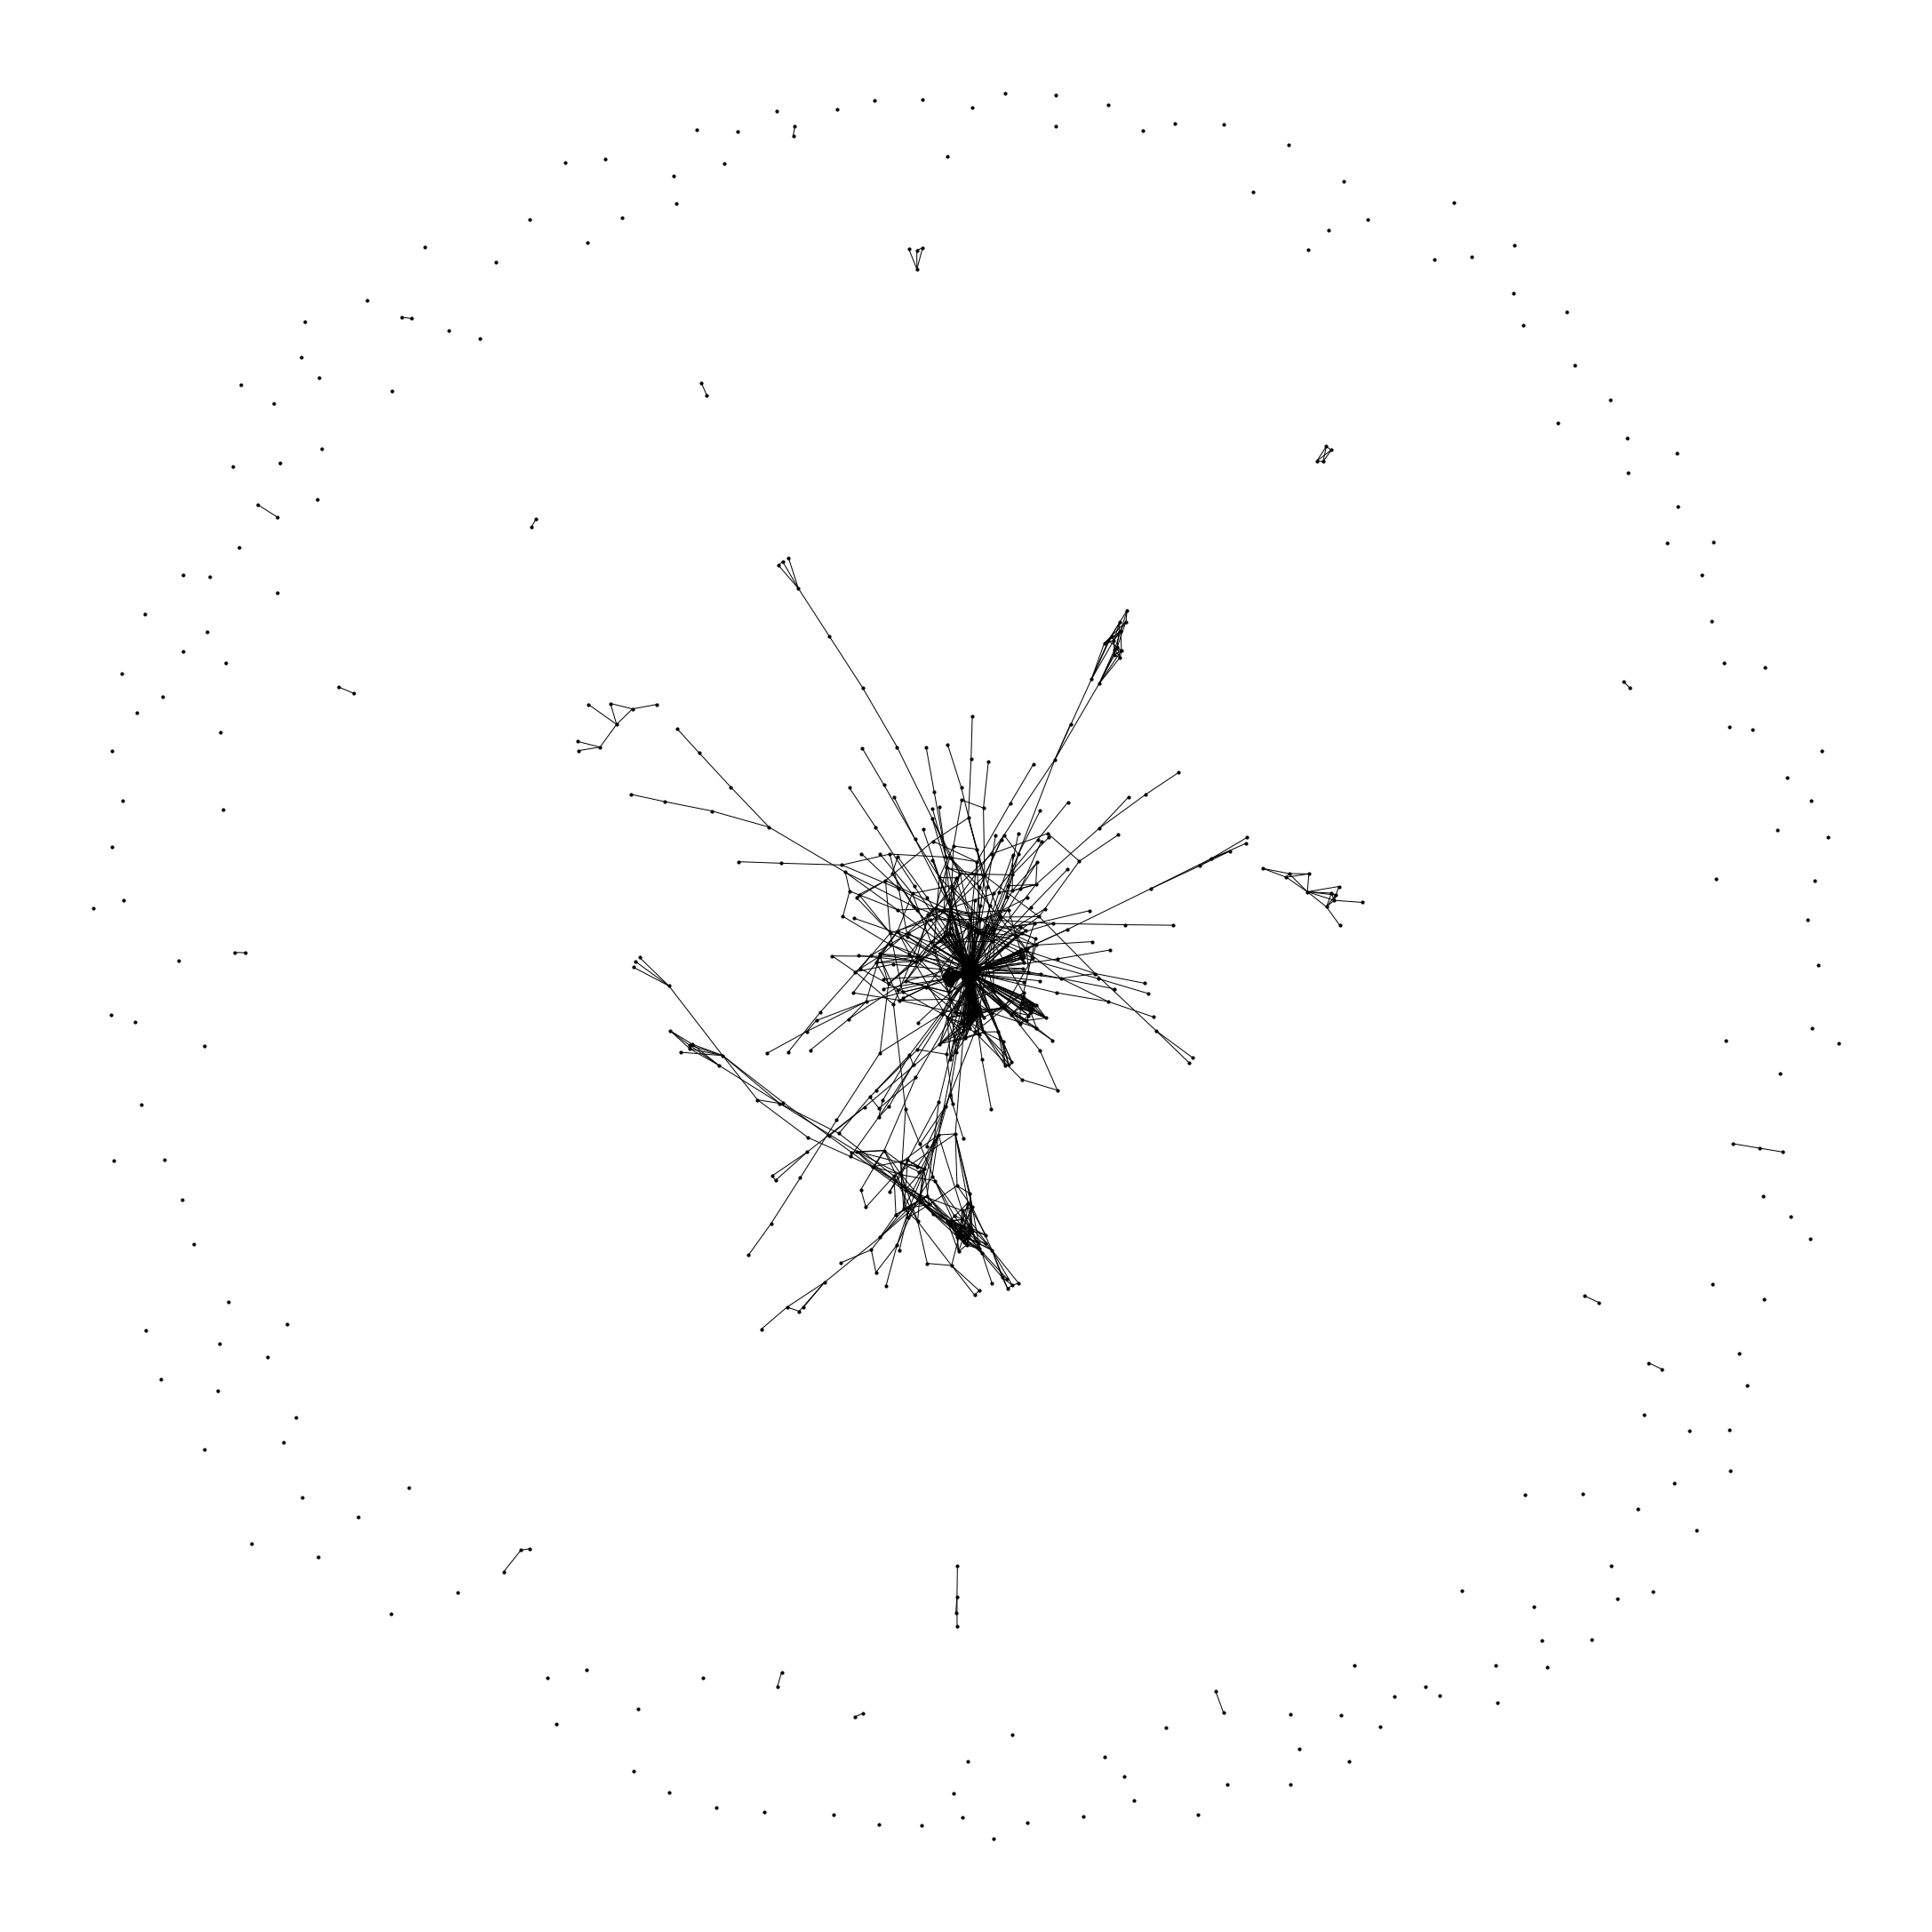

In [12]:
options = {'node_color':'black', 'node_size':10, 'width':1}
plt.figure(1, figsize = (30, 30))
nx.draw(FilmGraph, **options)